In [2]:
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [3]:
def load_dataset_withfeatures_pandas(dataset_path):
    """This function loads CSV datasets using the read_csv method of the pandas library.
    The CSV is epxected to be comma-separated, while separate examples are separated by new line.
    All but the last column are expected to be features, the last columns is parsed as output variable."""
    df = pd.read_csv(dataset_path)

    X = df.iloc[:, :-1].to_numpy()
    y = df.iloc[:, -1].to_numpy()

    feature_names = df.iloc[:, :-1].columns.tolist()

    return X, y, feature_names

In [4]:
def kfold_crossval(classifier, X, y, k=10):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=20)
    
    scores = cross_val_score(classifier, X, y, cv=skf)
    
    return scores.mean()


In [5]:
def test_and_plot_classifer_hyperparams(X, y, classifier, hyperparam_name, hyperparam_values):
    """Tests different classifiers for different values of a hyper parameter given to the function."""
    train_scores = []
    val_scores = []

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20)

    for value in hyperparam_values:
        # Set classifier hyperparameter
        setattr(classifier, hyperparam_name, value)
        
        # Perform cross-validation
        scores = cross_val_score(classifier, X, y, cv=skf)
        
        # Store average scores
        val_scores.append(scores.mean())

        # Optionally, train the classifier on the full dataset and evaluate its performance
        classifier.fit(X, y)
        train_score = classifier.score(X, y)
        train_scores.append(train_score)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(hyperparam_values, train_scores, label='Train Score')
    plt.plot(hyperparam_values, val_scores, label='Validation Score')
    plt.xlabel(hyperparam_name)
    plt.ylabel('Accuracy')
    plt.title(f'Classifier Performance vs {hyperparam_name}')
    plt.legend()
    plt.show()

## Iris dataset

0.7
0.7


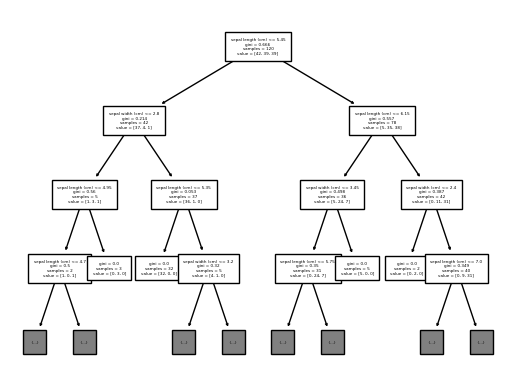

In [6]:
# TODO
# load data
X, y, feature_names = load_dataset_withfeatures_pandas("./iris_2D.csv")

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# 1.
# train decision tree
clf = tree.DecisionTreeClassifier(random_state=20)
clf.fit(X_train, y_train)

# calc accuracy
print(clf.score(X_test, y_test))

# 2.
# train decision tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# visualize decision tree
tree.plot_tree(clf, feature_names=feature_names, max_depth=3, fontsize=3)

# 3.
# train random forest
clf = RandomForestClassifier(random_state=20)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
# calc accuracy

## Adult dataset

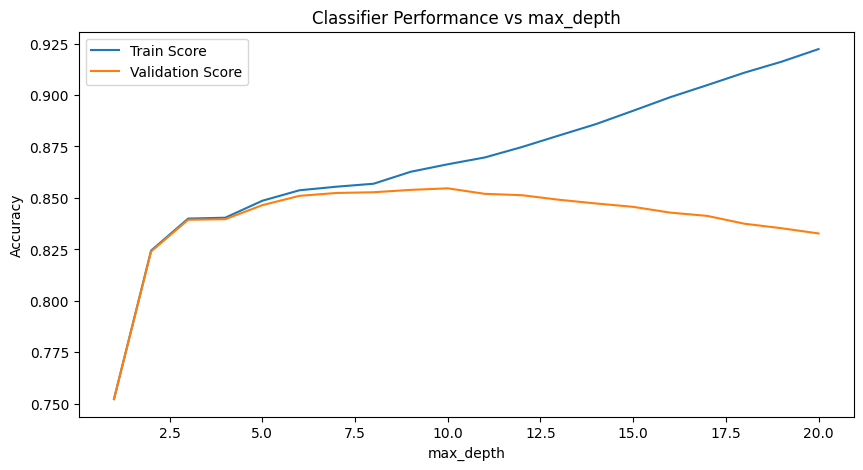

Top 10 Wichtigste Features im Random Forest Classifier:
                               feature  importance
99                              fnlwgt    0.175446
98                                 age    0.155781
101                       capital-gain    0.093552
103                     hours-per-week    0.084098
100                    educational-num    0.064771
25   marital-status_Married-civ-spouse    0.062462
44                relationship_Husband    0.044207
102                       capital-loss    0.030026
27        marital-status_Never-married    0.026439
33          occupation_Exec-managerial    0.016274


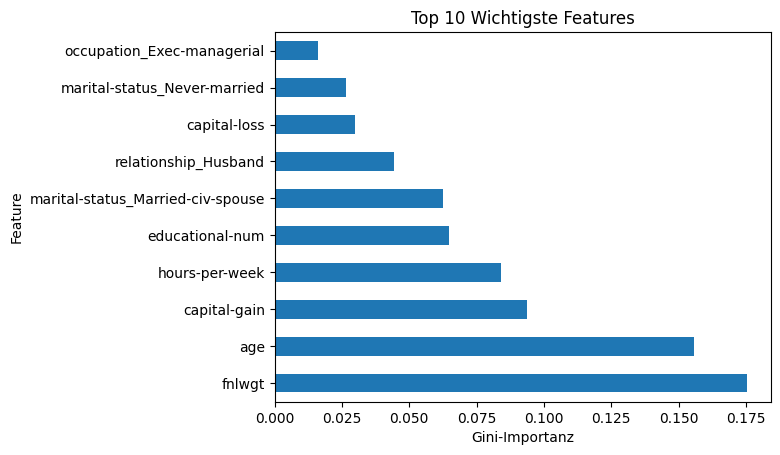

In [7]:
X, y, feature_names = load_dataset_withfeatures_pandas("./adult_onehotencoded.csv")

# 1. Decision Tree Analysis
max_depth_values = range(1, 21)
dt_classifier = DecisionTreeClassifier(random_state=20)
test_and_plot_classifer_hyperparams(X, y, dt_classifier, 'max_depth', max_depth_values)

# 2. Random Forest Analysis
rf_classifier = RandomForestClassifier(random_state=20)
rf_classifier.fit(X, y)

# Ermittlung der Feature-Importanzen
importances = rf_classifier.feature_importances_

# Erstellen eines DataFrames zur besseren Visualisierung
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sortieren der Features nach Wichtigkeit
sorted_features = feature_importances.sort_values(by='importance', ascending=False)

# Auswahl der Top 10 Features
top_10_features = sorted_features.head(10)

# Ausgabe der Top 10 Features
print("Top 10 Wichtigste Features im Random Forest Classifier:")
print(top_10_features)

# Optional: Plotten der Top 10 Features
top_10_features.plot(kind='barh', x='feature', y='importance', legend=False, title='Top 10 Wichtigste Features')
plt.xlabel('Gini-Importanz')
plt.ylabel('Feature')
plt.show()